# 1- Maximum Time Under Water

* We are first going to import pandas to deal with Dataframes :

In [1]:
import pandas as pd

* We define the dataframe funds which is created from the csv file funds.csv 

In [2]:
funds=pd.read_csv('funds.csv', index_col=0, parse_dates=[0], dayfirst=False)
funds

,BlackRock Multi-Asset Income Portfolio,iShares iBoxx $ High Yield Corporate Bond ETF,BlackRock Equity Dividend Fund,iShares 20+ Year Treasury Bond ETF,Vanguard Equity-Income Fund Investor Shares,Cash
2018-01-02,8.489755,66.994629,12.966429,112.028168,26.493795,21.902108
2018-01-03,8.520377,67.316780,13.011883,112.563812,26.571800,21.902960
2018-01-04,8.543343,67.431885,13.102796,112.545944,26.678167,21.903812
2018-01-05,8.551001,67.477905,13.170979,112.224556,26.805815,21.904663
2018-01-08,8.558652,67.424225,13.148252,112.153168,26.841272,21.907218
...,...,...,...,...,...,...
2023-03-27,9.521506,72.771469,17.823668,103.814133,38.150002,23.531225
2023-03-28,9.531456,72.731819,17.853539,104.003174,38.240002,23.534337
2023-03-29,9.581203,73.643700,18.052685,103.794228,38.680000,23.537449
2023-03-30,9.621000,74.079811,18.142302,104.271820,38.849998,23.540561


In [3]:
type(funds.index)

pandas.core.indexes.datetimes.DatetimeIndex

## Question 1

* Let write a function first_hitting_index

*    We set a default value that will be "The target is never hit"

Function explanations:
    We first create a serie composed of boolean
    
    then we do a for loop (we browse the serie)
    
    then we do two if loop:
    
    the first one return the first index with a true (there is a break to stop the loop)
    
    the second loop is for the case where there is no true in the serie so we return the default value

In [4]:
def first_hitting_index(s: pd.Series, nb: float, default="The target is never hit"):
    # Create a Boolean Series 'serie_bool' where each element is True if the corresponding element in 's' is greater than or equal to 'nb'
    serie_bool = s >= nb
    # Iterate through the elements of 'serie_bool' to find the index of the first occurrence where 'nb' is met or exceeded
    for i in range(len(serie_bool)):
        if serie_bool[i] == True:
            result = i  # Store the index where 'nb' is first met
            break
        if (i == len(serie_bool) - 1) and (serie_bool[i] == False):
            result = default  # If 'nb' is never hit, assign the 'default' value
    
    # Return the 'result', which is either the index where 'nb' is hit or the 'default' value if it's never hit
    return result
                   

## Question 2

In [5]:
def periods_under_water(s: pd.Series):
    # Initialize the necessary variables and data structures for tracking periods under water (HWMs)
    hwm_index = []  # List to store the indexes of high watermark periods

    max_tuw = pd.Timedelta(0)  # Variable to store the maximum time under water (Tuw)
    tuw_inter = pd.Timedelta(0)  # Variable to track the time under water in the current interval
    start_date = None  # Variable to store the start date of the maximum Tuw
    start_date_inter = None  # Variable to store the start date of the current Tuw interval
    end_date = None  # Variable to store the end date of the maximum Tuw
    end_date_inter = None  # Variable to store the end date of the current Tuw interval
    T = len(s)  # The total number of data points in the input Series
    actual_max = s[0]  # Initialize the current maximum to the first value in the Series

    # Iterate through the input Series to find the high watermark (HWM) periods and their indexes
    for i, value in s.items():
        if value >= actual_max:
            actual_max = value
            start_date_inter = i
            end_date_inter = None
            tuw_inter = pd.Timedelta(0)
        elif start_date_inter is not None:
            tuw_inter = i - start_date_inter
            end_date_inter = i
            if tuw_inter > max_tuw:
                max_tuw = tuw_inter
                start_date = start_date_inter
                end_date = end_date_inter

    # If no HWM periods were found, return a message
    if start_date is None:
        return "There is no HWM"
    else:
        # Return the start date, end date, and maximum time under water for the identified HWM period
        return start_date, end_date, max_tuw
    

## Question 3

In [6]:
def periods_under_water_dataframe(data:pd.DataFrame):
    N = len(data.columns)
    
    res = []  # We need to initialize an empty list to store the result
    
#We do a for loop to apply the function to the differents funds which are the columns of our dataframe
    for i in data.columns:
        res.append([i, periods_under_water(data[i])])
        
    return res

 

In [7]:
periods_under_water_dataframe(funds)

[['BlackRock Multi-Asset Income Portfolio',
  (Timestamp('2022-01-04 00:00:00'),
   Timestamp('2023-03-31 00:00:00'),
   Timedelta('451 days 00:00:00'))],
 ['iShares iBoxx $ High Yield Corporate Bond ETF',
  (Timestamp('2021-12-27 00:00:00'),
   Timestamp('2023-03-31 00:00:00'),
   Timedelta('459 days 00:00:00'))],
 ['BlackRock Equity Dividend Fund',
  (Timestamp('2022-04-20 00:00:00'),
   Timestamp('2023-03-31 00:00:00'),
   Timedelta('345 days 00:00:00'))],
 ['iShares 20+ Year Treasury Bond ETF',
  (Timestamp('2020-08-04 00:00:00'),
   Timestamp('2023-03-31 00:00:00'),
   Timedelta('969 days 00:00:00'))],
 ['Vanguard Equity-Income Fund Investor Shares',
  (Timestamp('2018-01-26 00:00:00'),
   Timestamp('2019-04-04 00:00:00'),
   Timedelta('433 days 00:00:00'))],
 ['Cash', 'There is no HWM']]

# 2- Factor-Based Covariance Matrix Estimation

## Question 1

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [9]:
#We import the csv file into a dataframe
weekly_factor=pd.read_csv('F-F_Research_Data_Factors_weekly.csv', delimiter=',',
                  skiprows=3, index_col=0)
weekly_factor=weekly_factor.drop(weekly_factor.index[-1])
weekly_factor

,Mkt-RF,SMB,HML,RF
19260702,1.60,-0.62,-0.83,0.056
19260710,0.36,-0.88,0.31,0.056
19260717,1.01,0.59,-1.44,0.056
19260724,-2.05,0.10,-0.18,0.056
19260731,3.04,-1.82,-0.90,0.056
...,...,...,...,...
20230630,2.36,0.58,0.35,0.101
20230707,-1.23,-0.42,1.33,0.112
20230714,2.53,1.38,-0.76,0.112
20230721,0.64,-0.01,2.47,0.112


In [10]:
#We import the csv file into a dataframe
daily_return_vw=pd.read_csv('100_Portfolios_10x10_Daily_VW.csv', delimiter=',',
                  skiprows=1, index_col=0)
daily_return_vw=daily_return_vw.drop(daily_return_vw.index[-1])
daily_return_vw

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,SMALL HiBM,...,BIG LoBM,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7,ME10 BM8,ME10 BM9,BIG HiBM
19260701,-99.99,0.00,-99.99,1.59,-3.08,4.64,2.57,3.81,-0.52,-0.84,...,0.03,1.10,-0.15,-0.03,0.52,0.48,-0.43,-0.08,0.17,-99.99
19260702,-99.99,-0.27,-99.99,0.00,-0.97,-4.10,0.31,-0.47,2.74,-0.27,...,0.31,0.71,0.97,0.57,0.52,0.15,0.63,-0.04,0.34,-99.99
19260706,-99.99,1.01,-99.99,-4.69,2.35,-1.79,0.00,2.44,-5.18,-0.23,...,0.49,-0.19,0.89,0.31,-0.12,-0.18,-0.33,-0.40,-0.34,-99.99
19260707,-99.99,-1.67,-99.99,4.92,0.51,5.27,0.00,-0.74,-0.24,-0.02,...,-0.20,-0.01,0.66,0.38,0.03,0.25,-0.29,0.52,0.17,-99.99
19260708,-99.99,0.00,-99.99,1.56,-0.51,-1.06,0.00,4.90,0.45,0.26,...,0.56,-0.12,0.35,0.55,-0.14,0.19,-0.12,0.54,0.51,-99.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230724,-2.30,-0.74,-0.90,-2.32,-1.23,-1.70,0.42,0.42,1.30,-0.43,...,0.49,-0.11,0.69,1.10,0.26,0.45,1.09,1.29,0.97,1.51
20230725,-1.40,-1.65,-0.37,-0.31,-1.31,-0.56,-1.57,0.26,-0.08,-1.39,...,0.64,0.19,0.41,0.13,0.83,-0.71,-0.73,-1.00,-0.92,-2.11
20230726,1.03,0.63,1.89,0.86,0.43,0.80,1.20,1.25,1.69,1.65,...,-0.81,-0.21,3.08,0.03,0.03,-0.42,0.58,0.61,1.13,0.59
20230727,-1.93,-0.84,-1.82,-1.45,-2.58,-2.65,-1.71,-1.85,-0.69,-1.28,...,-0.97,-0.48,-0.40,-1.89,1.05,0.17,-0.59,-2.55,-0.27,0.90


In [11]:
#We import the csv file into a dataframe
daily_return_ew=pd.read_csv('100_Portfolios_10x10_Daily_EW.csv', delimiter=',',
                  skiprows=1, index_col=0)
daily_return_ew=daily_return_ew.drop(daily_return_ew.index[-1])
daily_return_ew

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,SMALL HiBM,...,BIG LoBM,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7,ME10 BM8,ME10 BM9,BIG HiBM
19260701,-99.99,0.00,-99.99,1.59,-3.13,4.32,2.55,8.90,0.00,0.72,...,-0.02,0.24,0.11,0.00,0.09,0.51,-0.16,-0.04,0.17,-99.99
19260702,-99.99,-0.66,-99.99,0.00,-1.42,-4.11,0.30,-0.58,2.82,0.59,...,0.48,0.73,1.20,0.81,0.56,0.27,0.39,-0.10,0.34,-99.99
19260706,-99.99,0.87,-99.99,-4.69,2.74,-1.58,0.00,2.36,-5.90,-1.59,...,0.48,0.04,0.67,0.32,-0.19,-0.05,-0.16,-0.39,-0.34,-99.99
19260707,-99.99,-1.43,-99.99,4.92,0.60,6.07,0.00,-1.86,-0.03,-0.30,...,-0.27,-0.06,0.89,0.35,0.04,0.16,0.00,0.52,0.17,-99.99
19260708,-99.99,0.00,-99.99,1.56,-0.59,-0.54,0.00,7.25,0.89,2.52,...,0.59,-0.05,1.14,0.71,0.01,0.20,0.20,0.57,0.51,-99.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230724,-2.51,-1.44,-0.85,-1.79,-1.01,-1.48,0.09,0.37,0.56,-0.64,...,0.04,-0.03,0.12,1.28,0.36,0.43,0.91,1.29,0.72,1.56
20230725,-2.52,-2.47,-1.82,-0.23,-0.81,-0.46,-1.28,0.19,-0.53,-1.31,...,0.52,0.40,0.28,0.19,0.84,-0.41,-0.82,-1.00,-0.74,-2.34
20230726,0.28,1.29,1.33,0.35,0.38,1.10,1.26,0.83,1.24,1.30,...,-0.35,-0.01,0.22,-0.18,0.00,0.05,0.90,0.61,1.03,0.47
20230727,-1.58,-1.50,-1.66,-2.11,-2.05,-2.32,-1.53,-1.71,-0.65,-1.40,...,-0.99,-0.59,-0.66,-1.40,0.05,-0.33,-0.84,-2.55,0.33,0.86


## Question 2

In [12]:
type(weekly_factor.index)

pandas.core.indexes.base.Index

In [13]:
#We filter the dataframe for the date superior to 02/01/1970
weekly_factor.index=weekly_factor.index.astype(int) #change the type of index
updated_weekly_factor=weekly_factor[weekly_factor.index>=19700102]
updated_weekly_factor

,Mkt-RF,SMB,HML,RF
19700102,1.34,1.30,0.60,0.151
19700109,-0.58,1.52,0.51,0.151
19700116,-1.86,-0.60,-0.69,0.151
19700123,-2.03,0.81,1.25,0.151
19700130,-4.92,0.02,1.24,0.151
...,...,...,...,...
20230630,2.36,0.58,0.35,0.101
20230707,-1.23,-0.42,1.33,0.112
20230714,2.53,1.38,-0.76,0.112
20230721,0.64,-0.01,2.47,0.112


In [14]:
daily_return_vw.index=daily_return_vw.index.astype(int)
updated_daily_return_vw=daily_return_vw[daily_return_vw.index>=19700102]
updated_daily_return_vw
for c in updated_daily_return_vw.columns:
    if -99.99 in list(updated_daily_return_vw[c]): #We check if there are -99.99 in the value
        updated_daily_return_vw=updated_daily_return_vw.drop(c, axis=1) #if yes we delete d the funds

nb_portfolios=len(updated_daily_return_vw.columns)
print('The number of portfolios for the value weighted is: ', nb_portfolios)

The number of portfolios for the value weighted is:  96


In [15]:
daily_return_ew.index=daily_return_ew.index.astype(int)
updated_daily_return_ew=daily_return_ew[daily_return_ew.index>=19700102]
updated_daily_return_ew
for c in updated_daily_return_ew.columns:
    if -99.99 in list(updated_daily_return_ew[c]):
        updated_daily_return_ew=updated_daily_return_ew.drop(c, axis=1)

nb_portfolios=len(updated_daily_return_ew.columns)
print('The number of portfolios for the equaly weighted is: ', nb_portfolios)

The number of portfolios for the equaly weighted is:  96


## Question 3

In [16]:
initial_portfolio_value= 1
portfolio_value_ew=initial_portfolio_value*((1+updated_daily_return_ew/100).cumprod()) #We calculate the portfolio value

portfolio_value_vw=initial_portfolio_value*((1+updated_daily_return_vw/100).cumprod()) #We calculate the portfolio value


In [17]:
portfolio_value_ew

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,SMALL HiBM,...,ME9 BM8,ME9 BM9,ME9 BM10,BIG LoBM,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7
19700102,1.067300,1.050000,1.060500,1.049400,1.042000,1.060700,1.062400,1.028100,1.035100e+00,1.036800e+00,...,1.028100,1.024700,1.040400,1.005000,1.011100,1.002100,1.012600,1.012000,1.009600,1.010000
19700105,1.105082,1.080870,1.105253,1.083191,1.070655,1.085414,1.100646,1.063569,1.063669e+00,1.062409e+00,...,1.041671,1.039661,1.059335,1.007412,1.013628,1.004405,1.022523,1.014125,1.016970,1.011010
19700106,1.098231,1.072439,1.104479,1.078750,1.070120,1.087585,1.100977,1.063250,1.061329e+00,1.066127e+00,...,1.030525,1.029160,1.051814,0.998446,1.007445,0.990544,1.012196,1.008446,1.007411,0.998777
19700107,1.115034,1.079839,1.118175,1.090939,1.079430,1.091065,1.117051,1.070374,1.067803e+00,1.076362e+00,...,1.029495,1.025558,1.049290,0.993953,1.005631,0.989058,1.002580,1.011774,1.006705,0.995281
19700108,1.127411,1.093121,1.125890,1.107522,1.084071,1.098812,1.124647,1.077332,1.070045e+00,1.084758e+00,...,1.027847,1.025763,1.047716,0.995345,1.005531,0.987377,0.994760,1.014101,1.009222,0.995580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230724,3657.233660,25154.434837,116233.281012,131212.120697,415929.334565,421230.255351,512679.123567,918518.367431,2.369576e+06,1.079999e+08,...,256.729307,940.922396,104.973810,211.510581,331.630974,325.929018,758.402188,275.579355,648.390405,61.666425
20230725,3565.071372,24533.120297,114117.835298,130910.332819,412560.306955,419292.596176,506116.830786,920263.552329,2.357017e+06,1.065851e+08,...,256.498251,933.206832,104.312475,212.610436,332.957498,326.841619,759.843152,277.894222,645.732005,61.160760
20230726,3575.053572,24849.597549,115635.602507,131368.518984,414128.036122,423904.814734,512493.902854,927901.739814,2.386244e+06,1.079707e+08,...,257.395995,942.538901,106.231824,211.866299,332.924202,327.560671,758.475435,277.894222,646.054871,61.711207
20230727,3518.567725,24476.853585,113716.051506,128596.643234,405638.411381,414070.223032,504652.746140,912034.620063,2.370734e+06,1.064591e+08,...,255.336827,928.400817,102.322493,209.768823,330.959949,325.398770,747.856779,278.033169,643.922890,61.192833


In [18]:
portfolio_value_vw

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,SMALL HiBM,...,ME9 BM8,ME9 BM9,ME9 BM10,BIG LoBM,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7
19700102,1.053400,1.036600,1.048100,1.033700,1.037000,1.044400,1.051100,1.023500,1.030400,1.031500,...,1.024100,1.023100,1.038900,0.999300,1.013300,0.999100,1.009200,1.021200,1.010200,1.007800
19700105,1.076259,1.058369,1.082058,1.053547,1.062095,1.059962,1.078744,1.049497,1.056675,1.052852,...,1.035570,1.037628,1.055522,1.002997,1.012996,0.997601,1.019898,1.019362,1.020605,1.015963
19700106,1.066250,1.048208,1.077514,1.045329,1.059122,1.061763,1.077342,1.046558,1.051814,1.053484,...,1.025318,1.026214,1.046550,0.999086,1.007019,0.987625,1.010820,1.012838,1.005602,1.008039
19700107,1.079471,1.053764,1.092276,1.052647,1.066218,1.064099,1.090270,1.050117,1.055391,1.061280,...,1.025420,1.022930,1.043515,1.000185,1.005207,0.988317,1.002431,1.009394,1.001479,1.003200
19700108,1.089618,1.063353,1.092603,1.063278,1.068457,1.068781,1.098229,1.052217,1.056763,1.068178,...,1.023882,1.023646,1.041741,1.003985,1.006312,0.988514,0.995714,1.007981,0.998675,1.003300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230724,0.244892,16.954630,75.168852,93.124455,210.429426,341.491439,819.988606,782.829943,2468.362326,2147.689348,...,151.161664,727.325425,105.619906,162.692443,403.613752,273.864484,319.019427,153.785279,445.822914,32.355912
20230725,0.241463,16.674879,74.890727,92.835769,207.672800,339.579087,807.114784,784.865301,2466.387636,2117.836466,...,151.040735,719.615776,104.954501,163.733675,404.380618,274.987328,319.434152,155.061697,442.657571,32.119714
20230726,0.243950,16.779931,76.306162,93.634157,208.565793,342.295720,816.800162,794.676117,2508.069587,2152.780768,...,151.569378,727.819396,106.885664,162.407432,403.531419,283.456938,319.529983,155.108216,440.798409,32.306008
20230727,0.239242,16.638979,74.917390,92.276462,203.184796,333.224883,802.832879,779.974609,2490.763907,2125.225174,...,150.538706,715.373684,102.952271,160.832080,401.594468,282.323110,313.490866,156.736852,441.547766,32.115403


## Question 4

In [19]:
portfolio_weekly_returns=portfolio_value_vw.copy() #We create a copy

L=list(updated_weekly_factor.index) #List with the dates that correspond to the start of each week
L_2=list(portfolio_weekly_returns.index) #List with the daily dates 
for i in L_2:
    k=L_2.index(i)
    #if daily date is not a weekly date, we put a 0 for value
    if i not in L: 
        portfolio_weekly_returns.iloc[k]=0

portfolio_weekly_returns=portfolio_weekly_returns.loc[portfolio_weekly_returns['SMALL LoBM']!=0] #We delete all the lines with a 0

portfolio_weekly_returns=portfolio_weekly_returns.pct_change() #return calcul
portfolio_weekly_returns

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,SMALL HiBM,...,ME9 BM8,ME9 BM9,ME9 BM10,BIG LoBM,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7
19700102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19700109,0.031796,0.027655,0.035685,0.025220,0.029304,0.020787,0.037837,0.029805,0.024149,0.035661,...,-0.002412,-0.002968,-0.001376,0.005292,-0.007293,-0.016136,-0.018592,-0.017485,-0.031082,-0.005062
19700116,-0.015258,-0.029384,-0.029480,-0.033742,-0.017554,-0.016339,-0.042613,-0.020226,-0.014835,-0.010470,...,-0.026729,-0.030440,-0.022244,-0.002597,-0.016025,-0.003335,-0.013893,-0.026941,-0.032872,-0.021724
19700123,-0.012650,-0.010300,-0.014084,-0.002581,-0.026777,-0.012035,-0.014454,-0.005561,-0.012658,-0.006017,...,-0.005011,0.006010,0.000551,-0.037102,-0.009586,-0.021845,-0.024583,-0.008343,-0.018739,-0.026157
19700130,-0.046885,-0.060140,-0.057800,-0.038608,-0.049756,-0.051404,-0.046433,-0.046143,-0.036619,-0.025736,...,-0.045612,-0.061167,-0.031281,-0.056894,-0.052965,-0.028781,-0.058693,-0.039594,-0.062653,-0.054100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230630,0.023503,0.030219,0.002679,-0.027547,0.016772,0.009079,-0.038995,0.010365,0.010319,0.027163,...,0.026846,0.041122,0.031612,0.023893,0.007750,0.010541,-0.014422,0.021658,0.032119,0.032066
20230707,0.009955,-0.020315,-0.002356,-0.004905,-0.006783,-0.019104,-0.000625,0.011427,0.006328,0.011024,...,0.010740,0.009464,-0.000014,-0.011271,-0.019290,-0.012171,-0.015348,-0.010497,-0.002561,-0.000171
20230714,0.007599,0.012281,0.006901,0.003890,0.034300,0.026466,-0.001363,0.020926,0.021392,0.028531,...,0.005379,0.027694,-0.011163,0.025084,0.024520,0.037288,0.037868,0.029107,0.007548,0.014281
20230721,0.017220,-0.002109,0.009454,0.013855,0.027115,0.011197,0.034404,0.048066,0.029126,0.032652,...,0.029249,0.010451,0.042726,-0.001450,0.015858,-0.008638,0.031841,-0.000478,0.010771,0.029402


## Question 5

In [20]:
def factor_based_cov_matrix(df_asset: pd.DataFrame, df_factor: pd.DataFrame):
    # Check if the two input DataFrames have the same number of rows
    if len(df_asset.index) != len(df_factor.index):
        return "The two dataframes have not the same number of rows"
    else:
        # Calculate the number of observations (T) and the number of factors (K)
        T = len(df_factor.index)
        K = len(df_factor.columns)
        
        # Add a constant column to the factor DataFrame
        y = sm.add_constant(df_factor)
        
        # Create an Ordinary Least Squares (OLS) regression model to estimate asset returns based on factors
        mod = sm.OLS(df_asset, y)
        
        # Fit the OLS model to the data and obtain the regression results
        res = mod.fit()
        
        # Extract the estimated beta coefficients from the regression results, excluding the constant
        beta = res.params[1:]
        
        # Calculate the variance of residuals and create a diagonal covariance matrix
        var_residuals = (res.resid**2).sum() / (T - K - 1)
        diag_cov_matrix = np.diag(var_residuals)
        
        # Calculate the covariance matrix of factors
        covmatrixfactors = df_factor.cov()
        
        # Calculate the factor-based covariance matrix using the factor betas, factor covariance, and residual variance
        factor_based_covariance_matrix = beta.T @ covmatrixfactors @ beta + diag_cov_matrix
        
        # Return the factor-based covariance matrix
        return factor_based_covariance_matrix

- We delete the first line composed of Nan and the last columns of factors because we have only 3 pamameters to do the regression

In [21]:
factor_based_cov_matrix(portfolio_weekly_returns.iloc[1:], updated_weekly_factor.iloc[1:,:-1]) 

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.001247,0.000884,0.000896,0.000803,0.000762,0.000719,0.000691,0.000644,0.000621,0.000658,...,0.000471,0.000541,0.000645,0.000544,0.000508,0.000491,0.000500,0.000459,0.000448,0.000446
1,0.000884,0.001166,0.000835,0.000750,0.000713,0.000673,0.000648,0.000605,0.000584,0.000620,...,0.000451,0.000517,0.000618,0.000509,0.000477,0.000462,0.000473,0.000436,0.000428,0.000427
2,0.000896,0.000835,0.001114,0.000762,0.000724,0.000685,0.000661,0.000618,0.000597,0.000636,...,0.000464,0.000533,0.000639,0.000509,0.000480,0.000466,0.000479,0.000443,0.000438,0.000438
3,0.000803,0.000750,0.000762,0.000883,0.000656,0.000622,0.000603,0.000566,0.000548,0.000588,...,0.000442,0.000505,0.000610,0.000455,0.000435,0.000426,0.000442,0.000412,0.000413,0.000416
4,0.000762,0.000713,0.000724,0.000656,0.000836,0.000593,0.000575,0.000541,0.000523,0.000562,...,0.000429,0.000490,0.000592,0.000437,0.000418,0.000410,0.000427,0.000399,0.000401,0.000405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.000491,0.000462,0.000466,0.000426,0.000410,0.000389,0.000364,0.000354,0.000335,0.000363,...,0.000442,0.000490,0.000577,0.000521,0.000492,0.000577,0.000492,0.000470,0.000467,0.000473
92,0.000500,0.000473,0.000479,0.000442,0.000427,0.000407,0.000386,0.000377,0.000359,0.000394,...,0.000482,0.000534,0.000635,0.000524,0.000502,0.000492,0.000652,0.000494,0.000499,0.000509
93,0.000459,0.000436,0.000443,0.000412,0.000399,0.000383,0.000365,0.000360,0.000343,0.000380,...,0.000476,0.000527,0.000632,0.000492,0.000476,0.000470,0.000494,0.000637,0.000489,0.000501
94,0.000448,0.000428,0.000438,0.000413,0.000401,0.000388,0.000376,0.000374,0.000358,0.000403,...,0.000507,0.000561,0.000681,0.000471,0.000467,0.000467,0.000499,0.000489,0.000689,0.000526


## Question 6

In [22]:
#GMV Calculation following the definition given by email
def gmv(sigma):
    n=len(sigma)
    sigma_inverse=np.linalg.inv(sigma) #calculate a matrix inverse
    one_vector=np.ones(n)
    x=np.dot(one_vector,np.dot(sigma_inverse,one_vector)) #matrix multiplication
    gmv_result=np.dot(sigma_inverse,one_vector)/x
    return gmv_result

In [23]:
# We update the dateframe with the new range of dates:

portfolio_weekly_returns.index=portfolio_weekly_returns.index.astype(int) #change type
new_portfolio_weekly_returns=portfolio_weekly_returns[(portfolio_weekly_returns.index>=20210101) & (portfolio_weekly_returns.index < 20230101)] #filter on dates

updated_weekly_factor.index=updated_weekly_factor.index.astype(int) #change type
new_updated_weekly_factor=updated_weekly_factor[(updated_weekly_factor.index>=20210101) & (updated_weekly_factor.index<=20230101)] #filter on dates
new_updated_weekly_factor

,Mkt-RF,SMB,HML,RF
20210108,2.52,3.59,2.28,0.001
20210115,-1.03,2.33,2.15,0.001
20210122,2.08,1.83,-3.01,0.001
20210129,-3.48,0.06,0.78,0.001
20210205,5.27,2.06,-2.01,0.001
...,...,...,...,...
20221202,1.22,1.13,-2.44,0.083
20221209,-3.78,-1.27,-0.60,0.083
20221216,-2.12,0.10,0.25,0.083
20221223,-0.40,-0.88,2.90,0.083


In [24]:
# Let calculate the sample covariance matrix estimated:

sample_cov_matrix_estimated=new_portfolio_weekly_returns.cov()
sample_cov_matrix_estimated

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,SMALL HiBM,...,ME9 BM8,ME9 BM9,ME9 BM10,BIG LoBM,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7
SMALL LoBM,0.003420,0.002998,0.002960,0.002374,0.002877,0.002253,0.001796,0.001679,0.001201,0.001385,...,0.000648,0.000908,0.000807,0.001037,0.000809,0.000746,0.000595,0.000511,0.000702,0.000610
ME1 BM2,0.002998,0.003440,0.002981,0.002311,0.002679,0.002101,0.001750,0.001604,0.001220,0.001448,...,0.000592,0.000947,0.000727,0.000972,0.000701,0.000692,0.000528,0.000469,0.000685,0.000570
ME1 BM3,0.002960,0.002981,0.003247,0.002188,0.002634,0.002201,0.001693,0.001619,0.001169,0.001302,...,0.000624,0.000941,0.000813,0.001144,0.000852,0.000819,0.000616,0.000535,0.000775,0.000626
ME1 BM4,0.002374,0.002311,0.002188,0.002109,0.002150,0.001751,0.001474,0.001349,0.000992,0.001129,...,0.000600,0.000801,0.000762,0.000858,0.000711,0.000660,0.000532,0.000460,0.000655,0.000553
ME1 BM5,0.002877,0.002679,0.002634,0.002150,0.002971,0.002049,0.001686,0.001579,0.001128,0.001271,...,0.000724,0.000967,0.000863,0.000921,0.000761,0.000724,0.000570,0.000510,0.000780,0.000647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ME10 BM3,0.000746,0.000692,0.000819,0.000660,0.000724,0.000617,0.000551,0.000483,0.000367,0.000372,...,0.000419,0.000506,0.000567,0.000745,0.000569,0.000633,0.000417,0.000431,0.000501,0.000446
ME10 BM4,0.000595,0.000528,0.000616,0.000532,0.000570,0.000465,0.000457,0.000406,0.000331,0.000350,...,0.000439,0.000491,0.000545,0.000492,0.000427,0.000417,0.000448,0.000411,0.000468,0.000441
ME10 BM5,0.000511,0.000469,0.000535,0.000460,0.000510,0.000418,0.000488,0.000419,0.000351,0.000381,...,0.000510,0.000583,0.000638,0.000518,0.000453,0.000431,0.000411,0.000555,0.000513,0.000534
ME10 BM6,0.000702,0.000685,0.000775,0.000655,0.000780,0.000670,0.000637,0.000630,0.000510,0.000570,...,0.000694,0.000813,0.000907,0.000573,0.000520,0.000501,0.000468,0.000513,0.000859,0.000675


In [25]:
# Let Calculate the factor-based matrix estimated:
factor_based_matrix_estimated=factor_based_cov_matrix(new_portfolio_weekly_returns, new_updated_weekly_factor.iloc[:,:-1])
factor_based_matrix_estimated

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.003448,0.002369,0.002431,0.001915,0.002192,0.001824,0.001557,0.001356,0.000997,0.001117,...,0.000608,0.000729,0.000740,0.001089,0.000804,0.000754,0.000582,0.000548,0.000669,0.000538
1,0.002369,0.003474,0.002329,0.001842,0.002114,0.001765,0.001513,0.001324,0.000981,0.001110,...,0.000606,0.000726,0.000729,0.000998,0.000744,0.000694,0.000550,0.000525,0.000652,0.000534
2,0.002431,0.002329,0.003272,0.001901,0.002168,0.001800,0.001542,0.001343,0.000985,0.001091,...,0.000636,0.000760,0.000787,0.001179,0.000869,0.000820,0.000622,0.000591,0.000709,0.000575
3,0.001915,0.001842,0.001901,0.002128,0.001720,0.001434,0.001243,0.001092,0.000813,0.000912,...,0.000561,0.000667,0.000686,0.000915,0.000686,0.000644,0.000504,0.000494,0.000606,0.000511
4,0.002192,0.002114,0.002168,0.001720,0.003001,0.001647,0.001430,0.001259,0.000941,0.001063,...,0.000645,0.000768,0.000783,0.001003,0.000757,0.000708,0.000564,0.000555,0.000690,0.000584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.000754,0.000694,0.000820,0.000644,0.000708,0.000581,0.000539,0.000482,0.000359,0.000369,...,0.000425,0.000494,0.000566,0.000763,0.000576,0.000635,0.000403,0.000422,0.000484,0.000439
92,0.000582,0.000550,0.000622,0.000504,0.000564,0.000472,0.000457,0.000421,0.000330,0.000363,...,0.000402,0.000466,0.000514,0.000536,0.000423,0.000403,0.000452,0.000350,0.000426,0.000406
93,0.000548,0.000525,0.000591,0.000494,0.000555,0.000472,0.000482,0.000456,0.000373,0.000422,...,0.000498,0.000576,0.000628,0.000544,0.000447,0.000422,0.000350,0.000559,0.000511,0.000505
94,0.000669,0.000652,0.000709,0.000606,0.000690,0.000595,0.000620,0.000595,0.000498,0.000580,...,0.000663,0.000767,0.000822,0.000608,0.000518,0.000484,0.000426,0.000511,0.000865,0.000666


In [26]:
# Let calculate the GMV for the sample covariance matrix:

gmv_sample_cov=gmv(sample_cov_matrix_estimated)
gmv_sample_cov

array([ 0.39535157,  0.06032745, -0.23684109, -0.4224395 , -0.17817013,
       -0.55287409,  0.22426592,  0.25071552,  1.10126366, -0.45402908,
        0.12874296, -0.20420315, -0.24405863,  0.24663127, -0.04811776,
       -0.51435495,  0.21229725,  0.29098174,  1.03162258,  0.09186024,
       -0.2700888 ,  0.31578772,  0.06826835,  0.28961809,  0.21125386,
        0.40608374, -0.39903279,  0.45628796, -0.54704887,  0.16754408,
        0.21626888, -0.21848369,  0.02982243, -0.27817184, -1.73353378,
        0.29060991, -0.32264417, -0.30327564, -0.18229986,  0.31892618,
       -0.03400441,  0.25982238,  0.9284994 , -0.36964761, -0.52411921,
        0.3191048 ,  0.47000949,  0.41874914, -0.52363523, -0.64897134,
       -0.22059969, -0.75084957,  0.01282635,  0.17564827,  1.22345772,
        0.58089268, -0.08025768, -0.19186465, -0.39388938, -0.38270938,
       -0.7203465 , -1.16590983,  1.83960644,  0.43432154,  0.09300083,
       -1.16190473, -0.33108132,  0.24169636, -0.15204141,  1.55

In [27]:
# Let calculate the GMV for the factor-based covariance matrix:

gmv_factor_cov=gmv(factor_based_matrix_estimated)
gmv_factor_cov

array([-3.32463975e-04,  5.67563575e-03, -1.55060213e-02,  2.04206566e-02,
       -2.49837005e-03,  2.55233822e-02,  4.78389615e-02,  6.90211018e-02,
        2.71720335e-01,  1.24254986e-01, -1.61546048e-02,  1.09102499e-02,
       -8.15913950e-03,  8.90885599e-03,  5.72447578e-02,  9.07436140e-02,
        6.95085975e-02,  5.67812745e-02,  9.38178658e-02,  1.05386511e-02,
       -6.22886799e-02, -1.70054174e-02,  2.17927944e-02, -4.41219858e-02,
        3.73220323e-03, -4.31418950e-02,  4.46662876e-02,  6.06326470e-02,
        7.62229240e-03, -1.97888727e-02, -6.10739558e-02, -1.44496971e-02,
       -5.39096482e-02, -1.11231613e-01, -8.11815348e-02, -4.88342919e-02,
        8.92628179e-02,  1.40453717e-01,  1.56946612e-01, -7.36307417e-02,
       -2.37018449e-02,  2.17654658e-02, -3.49094384e-02, -4.43598067e-02,
       -3.23229598e-03, -9.56618725e-03,  5.04656863e-02, -8.85964637e-02,
       -1.31181711e-01, -1.06139704e-01, -9.98192735e-03, -4.16074328e-02,
       -2.63855861e-02,  

In [28]:
print(gmv_sample_cov.shape,gmv_factor_cov.shape)

(96,) (96,)


In [29]:
# Let see which portfolio has the bigger range of weights:
range_weight_sample=max(gmv_sample_cov)-min(gmv_sample_cov) #range calculation
range_weight_factor=max(gmv_factor_cov)-min(gmv_factor_cov) #range calculation
if range_weight_factor > range_weight_sample:
    print('Factors portfolio has the bigger range of weights')
else:
    print('Sample portfolio has the bigger range of weights')


Sample portfolio has the bigger range of weights


## Question 7

In [30]:
#Leverage calculation following the definition given in the assignment
def leverage_amount(x:np.array):
    S=0
    for w in x:
        S=S+abs(w)
    lev=1/2*(S-1)
    return lev

In [31]:
leverage_sample=leverage_amount(gmv_sample_cov)
leverage_factor=leverage_amount(gmv_factor_cov)
print('leverage for sample portfolio : ', leverage_sample)
print('leverage for factor portfolio : ', leverage_factor)

leverage for sample portfolio :  22.896616193004977
leverage for factor portfolio :  2.506726915898048


## Question 8

## Question 9

## Question 10

# 3- Asian Option Pricing

## Question 1

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
import pandas as pd

In [33]:
def gbm_simulate(r: float, sigma: float, initial: float,
                 n_paths: int, time_step: float, n_periods: int,
                 rng: np.random._generator.Generator):
    """
    Simulate paths for a Geometric Brownian motion.

    """
    
    logS = np.empty((n_periods + 1, n_paths))  # Pre-allocation with an empty array
    
    logS[0, :] = np.log(initial)  # Initial log price
    
    m = r - .5 * sigma**2  # Expected log return
    
    for i in range(1, n_periods + 1):
        std_innov = rng.standard_normal(n_paths)
        logS[i, :] = logS[i - 1, :] + m * time_step + sigma * np.sqrt(time_step) * std_innov
        
    S = np.exp(logS)    
    
    return S

In [34]:
#We apply the function with our parameters
rng = np.random.default_rng(seed=123)
r=0.02
sigma=0.18
initial=100
n_paths=10000
time_step=1/264
n_periods=132

S=gbm_simulate(r, sigma, initial, n_paths, time_step, n_periods, rng)
print(S, S.shape)

[[100.         100.         100.         ... 100.         100.
  100.        ]
 [ 98.91163363  99.59481981 101.43848114 ...  99.85693183  98.38109818
  100.37156383]
 [ 98.3975727   97.77685918 101.6947336  ...  99.14339083  99.52707199
   99.82240405]
 ...
 [120.8276415  100.61752812 107.04273028 ... 120.84856981  95.9361635
   90.78660289]
 [123.59946649  99.5666314  106.4915918  ... 120.8678672   95.41511612
   91.62956039]
 [125.5074154   97.83926311 103.39460122 ... 122.20565488  95.8129322
   91.43797186]] (133, 10000)


## Question 2

- We Calculate the option payoff with the definition of the asian payoff

In [35]:
K=100

option_payoff=np.maximum(np.sum(S[1:], axis=0)/n_periods-K,0)


option_payoff


array([10.83986336,  0.        ,  0.        , ..., 10.15996278,
        0.        ,  0.        ])

- We Calculate the option price with the definition of the option price 

In [36]:
maturity=0.5

option_price=np.exp(-r*maturity)*np.mean(option_payoff)

option_price


3.191271339723251

## Question 3

In [41]:
weekly_monitoring=list()
new_line=0

while new_line <= S.shape[0]:
    weekly_monitoring.append(new_line)
    new_line=new_line+5 #We take every 5 value
    
# create arrays composed of zeros:

spot=np.zeros((len(weekly_monitoring),n_paths))
asian_spot= np.zeros((1,n_paths))
asian_payoff= np.zeros((1,n_paths))


for i,value in enumerate(weekly_monitoring):
    spot[i]=S[value]
    
n=spot.shape[0]
asian_payoff=np.maximum(1/n* np.sum(spot,axis=0)-K,0) # Definition of payoff
asian_price=np.exp(-r*maturity)*np.mean(asian_payoff)# Definition of price

asian_price

3.1199118423044827

## Question 4

- We use the definition of price to create a array composed of the price for each maturity
- We calculate the bounds with the course's formula
- We store the results into a dataframe to make them more readable


In [42]:
def estimate_option_price(array_value: np.array, K: float,r: float,
                 n_paths: int, n_periods: int, time_step: int):
    price=np.zeros(n_periods+1)
    std=np.zeros(n_periods+1)
    
    list_columns=['Option Price', 'Lower Bound', 'Upper Bound']
    df_intervals=pd.DataFrame(columns=list_columns)
    index=[]
    for i in range(1,n_periods+1):
        index.append(i)
        payoff=np.maximum(np.mean(array_value[1:i+1], axis=0)-K,0)
        esperance=np.mean(payoff)
        price[i]=np.exp(-r*i/time_step)*esperance
        std[i]=np.std(payoff)

    df_intervals['Option Price']=price
    df_intervals['Lower Bound']=df_intervals['Option Price']-1.96*std/np.sqrt(n_paths)
    df_intervals['Upper Bound']=df_intervals['Option Price']+1.96*std/np.sqrt(n_paths)
    
    return df_intervals
    

In [43]:
df_interval=estimate_option_price(S,100, 0.02, 100000,132,264)
df_interval

,Option Price,Lower Bound,Upper Bound
0,0.000000,0.000000,0.000000
1,0.449589,0.445566,0.453612
2,0.506326,0.501817,0.510835
3,0.569863,0.564803,0.574923
4,0.625503,0.619917,0.631088
...,...,...,...
128,3.138394,3.109510,3.167279
129,3.151696,3.122684,3.180709
130,3.164932,3.135792,3.194072
131,3.178120,3.148854,3.207386


## Question 5

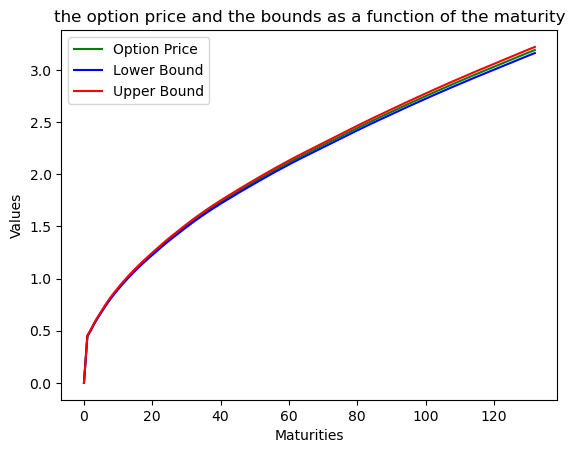

In [44]:
x=list(df_interval.index)

y_1=df_interval['Option Price']
y_2=df_interval['Lower Bound']
y_3=df_interval['Upper Bound']

plt.plot(x,y_1, label="Option Price",color="green")
plt.plot(x,y_2, label="Lower Bound", color="blue")
plt.plot(x,y_3, label="Upper Bound", color="red")

plt.xlabel("Maturities")
plt.ylabel("Values")
plt.legend()
plt.title('the option price and the bounds as a function of the maturity')
plt.show()